In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/apr_6-10.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-06,1246991679346765825,4/2 \nSir markets are opening slowly . Traffic...,[],0.0,"{'country_code': 'in', 'state': 'Jammu and Ka...",sir markets opening slowly traffic movements q...,-1
1,2020-04-06,1246991724695547906,Great News during the dark days of corona outb...,"['BackTheBlue', 'JayHind']",1.0,{'country_code': 'in'},great news dark days corona outbreak hope get ...,1
2,2020-04-06,1246991812708847616,Hey @sprint! Thanks for cutting off my phone s...,"['pandemic', 'Covid_19']",9.0,"{'country_code': 'in', 'state': 'Delhi'}",hey ! thanks cutting phone service ! noticed p...,1
3,2020-04-06,1246991837354545152,"As cases cross 3500, a pattern emerges: 80 per...",[],0.0,{'country_code': 'in'},cases cross pattern emerges per cent districts...,0
4,2020-04-06,1246992471122276352,"Wonderful way of handling citizens, vendors an...","['Surat', 'GujaratFightsCovid19', 'IndiaFights...",3.0,"{'country_code': 'in', 'state': 'Delhi'}",wonderful way handling citizens vendors hurdle...,1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(443746, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-06,1246991679346765825,4/2 \nSir markets are opening slowly . Traffic...,[],0.0,"{'country_code': 'in', 'state': 'Jammu and Ka...",sir markets opening slowly traffic movements q...,-1
1,2020-04-06,1246991724695547906,Great News during the dark days of corona outb...,"['BackTheBlue', 'JayHind']",1.0,{'country_code': 'in'},great news dark days corona outbreak hope get ...,1
2,2020-04-06,1246991812708847616,Hey @sprint! Thanks for cutting off my phone s...,"['pandemic', 'Covid_19']",9.0,"{'country_code': 'in', 'state': 'Delhi'}",hey ! thanks cutting phone service ! noticed p...,1
3,2020-04-06,1246991837354545152,"As cases cross 3500, a pattern emerges: 80 per...",[],0.0,{'country_code': 'in'},cases cross pattern emerges per cent districts...,0
4,2020-04-06,1246992471122276352,"Wonderful way of handling citizens, vendors an...","['Surat', 'GujaratFightsCovid19', 'IndiaFights...",3.0,"{'country_code': 'in', 'state': 'Delhi'}",wonderful way handling citizens vendors hurdle...,1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
443741,2020-04-10,1248629525690208258,ani should avoid publishing photos of these la...,[],0.0,{'country_code': 'in'},ani avoid publishing photos ladies nobody woul...,1
443742,2020-04-10,1248696155266932736,Amazing kids - this is heartbreaking https://t...,[],8.0,{'country_code': 'in'},amazing kids heartbreaking,1
443743,2020-04-10,1248483932569387009,Thank you https://t.co/8iQ2zZSHXZ,[],0.0,"{'country_code': 'in', 'state': 'Haryana', 'c...",thank,1
443744,2020-04-10,1248544578442907648,#Indian Muslims are fighting 2 viruses \n1. #C...,"['Indian', 'COVIDー19', 'Hindutva', 'Islamophob...",3.0,{'country_code': 'in'},indian muslims fighting viruses covid hindutva...,-1
443745,2020-04-10,1248452618449350656,This is a specious argument that could cause h...,[],6.0,"{'country_code': 'in', 'state': 'Maharashtra'...",specious argument could cause havoc covid onsl...,-1


In [ ]:
print(df.shape)
df.isnull().sum()

(443746, 8)


date             0
id               0
text             0
hashtags         7
retweet_count    7
location         7
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    sir markets opening slowly traffic movements q...
1    great news dark days corona outbreak hope get ...
2    hey  thanks cutting phone service  noticed pan...
3    cases cross pattern emerges per cent districts...
4    wonderful way handling citizens vendors hurdle...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

443746


'sir markets opening slowly traffic movements quite visible roads people assembling everywhere childrns playing roaming throughout day short people village people violating covid lockdown making mockery things'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.405525207519531 secs.


In [ ]:
t_clean[0]

['sir',
 'market',
 'open',
 'slowly',
 'traffic',
 'movement',
 'quite',
 'visible',
 'road',
 'people',
 'assemble',
 'everywhere',
 'childrns',
 'play',
 'roam',
 'throughout',
 'day',
 'short',
 'people',
 'village',
 'people',
 'violate',
 'covid',
 'lockdown',
 'make',
 'mockery',
 'thing']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

sir


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

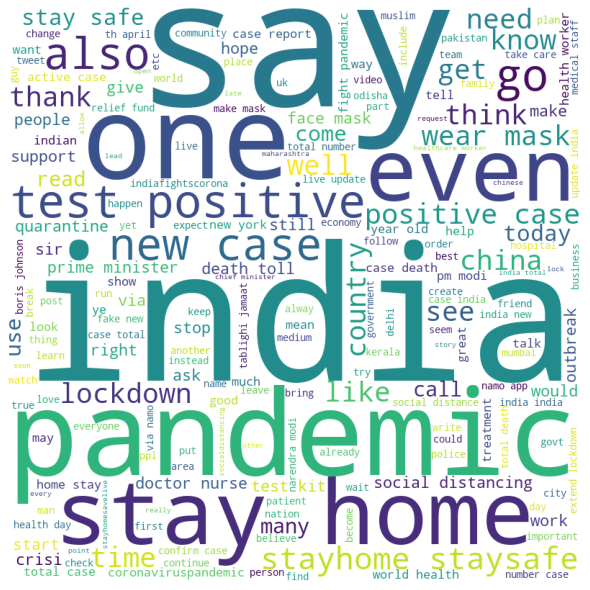

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['sir market open slowly traffic movement quite visible road people assemble everywhere childrns play roam throughout day short people village people violate covid lockdown make mockery thing',
 'great news dark day corona outbreak hope get want host afc badly backtheblue jayhind',
 'hey thanks cut phone service notice pandemic small business owner never mind many other suffer badly thanks sharp slap face loyal customer year rock covid',
 'case cross pattern emerges per cent district coronavirus outbreak news indian express',
 'wonderful way handle citizen vendor hurdle surat city gujarat state gujaratfightscovid indiafightscorona india ontheway']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aarogya setu',
 'aarogya setu app',
 'across country',
 'across globe',
 'across india',
 'across world',
 'action take',
 'active case',
 'active case cure',
 'active case total',
 'admit hospital',
 'advisor union',
 'advisor union minister',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amidst lockdown',
 'andhra pradesh',
 'animal pandemic',
 'animal pandemic please',
 'anti national',
 'antibody test',
 'april pm',
 'april th',
 'around world',
 'arvind kejriwal',
 'asharamji bapu',
 'asharamjiashrams servinghumanity',
 'ask question',
 'baby pure',
 'baby pure form',
 'back home',
 'baje minute',
 'ban export',
 'battle humanity',
 'battle humanity future',
 'battle pandemic',
 'bbc news',
 'best cm',
 'best way',
 'bhilwara model',
 'boost immunity',
 'boris johnson',
 'boris johnson move',
 'break chain',
 'break news',
 'break news celebrity',
 'breakthechain stayhome',
 'breakthechain stayhome lockdown',
 'british pm',
 'british prime',
 'british p

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:social distancing,active case,case total,confirm case,total death,update india,india total,total confirm,update stayhome,total recovered\nTopic 1:new case,face mask,total case,case death,take care,report new,late update,new death,report new case,amid pandemic\nTopic 2:year old,union minister,minister state,via namo,namo app,via namo app,mask make,tamil nadu,public health,good news\nTopic 3:stayhome staysafe,wear mask,test kit,social distance,extend lockdown,th april,warrior like,india news,use mask,wash hand\nTopic 4:death toll,case india,give life,offer prayer,save life,healthcare worker,health care,state government,front line,west bengal\nTopic 5:test positive,new york,pm modi,tablighi jamaat,happiness prosperity,health ministry,due lockdown,work home,time india,lockdown till\nTopic 6:positive case,prime minister,total number,health family,family welfare,health family welfare,state health,service do,mother give,do warrior\nTopic 7:fight pandemic,india india,doctor nurse,heal

In [ ]:
lda.perplexity(tf)

523.9157337165269

In [ ]:
f=open('lda_apr_6-10.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_apr_6-10.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_apr_6-10.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_apr_6-10.pk')
shutil.move("topics_apr_6-10.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_apr_6-10.txt')